Supervised ML Objective: Training dataset to recognize handwritten digits

Explanation of data: This is digits dataset available from sckit-learn. It consists of images of digits. 

ML Model output : Classification

(1797, 64)


<Figure size 432x288 with 0 Axes>

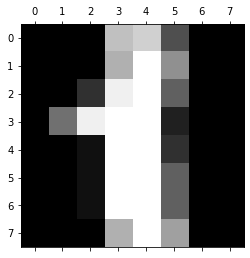

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits #This is digits dataset available from sckit-learn
digits = load_digits()
X = digits.data
y = digits.target
print(digits.data.shape)
(1797, 64)
plt.gray() 
plt.matshow(digits.images[1]) 
plt.show()

Splitting data randomly to 60% data for training and rest for testing.

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=123)

Regularization using LASSO method

In [3]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso

n_lambda = 100
lambdas1 = np.logspace(-6,0, n_lambda)

MSE_train = []
MSE_test = []
coefs = []
for ld in lambdas1:
    lassocv = Lasso(alpha=ld)
    model_LS = lassocv.fit(X_train, y_train)
    y_predLS_cv_train = model_LS.predict(X_train)
    y_predLS_cv_test = model_LS.predict(X_test)
    MSE_train.append(mse(y_train,y_predLS_cv_train))
    MSE_test.append(mse(y_test,y_predLS_cv_test))
    coefs.append(model_LS.coef_)    

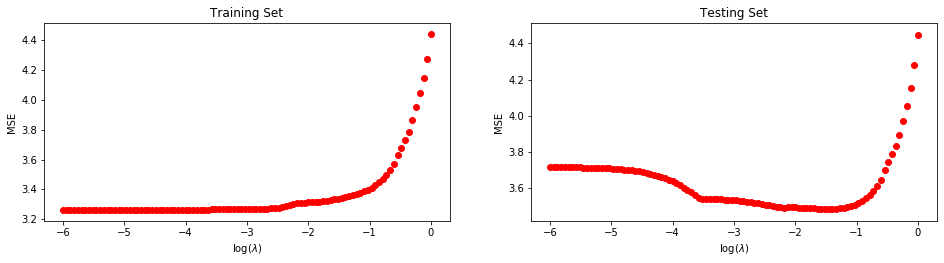

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=False)


ax1 = plt.subplot(221)
ax1.scatter(np.log10(lambdas1), MSE_train,color="red")
ax1.set_title("Training Set")
ax2 = plt.subplot(222)
ax2.scatter(np.log10(lambdas1), MSE_test,color="red")
ax2.set_title("Testing Set")

ax1.set_xlabel("log($\\lambda$)")
ax2.set_xlabel("log($\\lambda$)")
ax1.set_ylabel('MSE')
ax2.set_ylabel('MSE')

plt.show()

Training model using Random Forest method. Random Forest is versatile ML model and also the best to use when we cannot
think of any algorithm. 

In [5]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=100,criterion="gini").fit(X_train,y_train)

Predicting outcome from testing set

In [6]:
y_pred_RF = model_RF.predict(X_test)


Visualization of test samples and predicted value

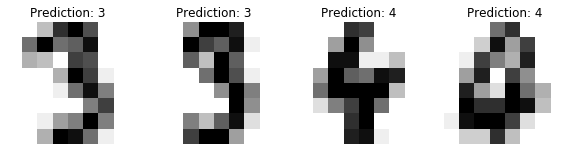

In [7]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred_RF):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

The common evaluation metric for classification is accuracy accuracy, 
which is the fraction of samples predicted correctly.

In [9]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_RF)

0.9652294853963839

The accuracy is 0.96 for our ML model. This proves that our ML model is good. 